In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

# 1 Collect the data

In [2]:
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)
end = now
ticker = "AAPL"

df = yf.download(ticker, start, end)
# df = yf.download(ticker, period="7d", interval="1h")
df
# df = yf.Ticker(ticker)
# df.option_chain(df.options[0]).calls
# df.info  ==> donne toutes les informations de l'entreprise ==> trop fort.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-16,27.904793,27.904793,27.440273,27.665832,143497200
2015-03-17,28.371553,28.434085,28.061128,28.116960,204092400
2015-03-18,28.690903,28.844999,28.221915,28.362611,261083600
2015-03-19,28.474276,28.865099,28.451943,28.753435,183238000
2015-03-20,28.116962,28.675280,27.951700,28.641782,274780400
...,...,...,...,...,...
2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200
2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400


# 2 Data Exploration & Visualization

In [3]:
# Pour determiner le nombre de lignes et colonnes
df.shape

(2516, 5)

In [4]:
# Pour déterminer si il y a des valeurs nulles
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [5]:
# Statistiques des données
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,98.227446,99.192466,97.158011,98.142244,1.133401e+08
std,67.761828,68.401979,67.032941,67.695512,6.563487e+07
min,20.674538,20.978904,20.475437,20.596721,2.323470e+07
25%,36.519739,36.847920,36.187554,36.536324,6.930610e+07
50%,72.226559,72.947805,70.797588,71.830382,9.760705e+07
75%,155.538113,158.173314,153.030305,156.122203,1.377019e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [6]:
# Le type de données de chaque colonnes
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [7]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-16,27.904793,27.904793,27.440273,27.665832,143497200
2015-03-17,28.371553,28.434085,28.061128,28.116960,204092400
2015-03-18,28.690903,28.844999,28.221915,28.362611,261083600
2015-03-19,28.474276,28.865099,28.451943,28.753435,183238000
2015-03-20,28.116962,28.675280,27.951700,28.641782,274780400


In [8]:
# On doit travailler sur un index numérique et non sur dates
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-03-16,27.904793,27.904793,27.440273,27.665832,143497200
1,2015-03-17,28.371553,28.434085,28.061128,28.116960,204092400
2,2015-03-18,28.690903,28.844999,28.221915,28.362611,261083600
3,2015-03-19,28.474276,28.865099,28.451943,28.753435,183238000
4,2015-03-20,28.116962,28.675280,27.951700,28.641782,274780400


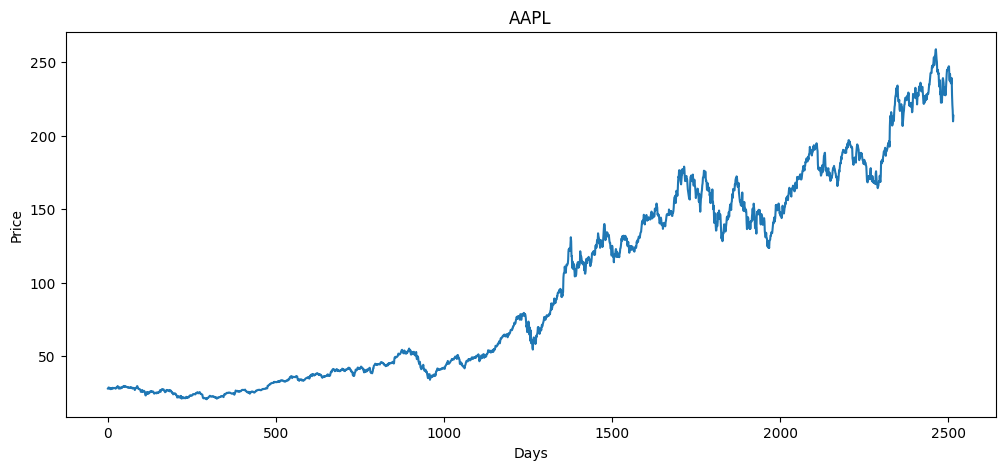

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# 3 Feature Engineering

In [10]:
df1 = pd.DataFrame({"0":[10, 20, 30, 40, 50, 60, 70, 80, 90, 10]})
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,10


In [11]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,10,62.0


### 100 days Moving Average

In [12]:
df['MA_100'] = df.Close.rolling(100).mean()
df

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-03-16,27.904793,27.904793,27.440273,27.665832,143497200,NaN
1,2015-03-17,28.371553,28.434085,28.061128,28.116960,204092400,NaN
2,2015-03-18,28.690903,28.844999,28.221915,28.362611,261083600,NaN
3,2015-03-19,28.474276,28.865099,28.451943,28.753435,183238000,NaN
4,2015-03-20,28.116962,28.675280,27.951700,28.641782,274780400,NaN
...,...,...,...,...,...,...,...
2511,2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200,236.537653
2512,2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400,236.438132
2513,2025-03-12,216.979996,221.750000,214.910004,220.139999,62547500,236.274568


In [13]:
df.tail()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
2511,2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200,236.537653
2512,2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400,236.438132
2513,2025-03-12,216.979996,221.750000,214.910004,220.139999,62547500,236.274568
2514,2025-03-13,209.679993,216.839996,208.419998,215.949997,61368300,236.058658
2515,2025-03-14,213.490005,213.949997,209.580002,211.250000,60060200,235.877156


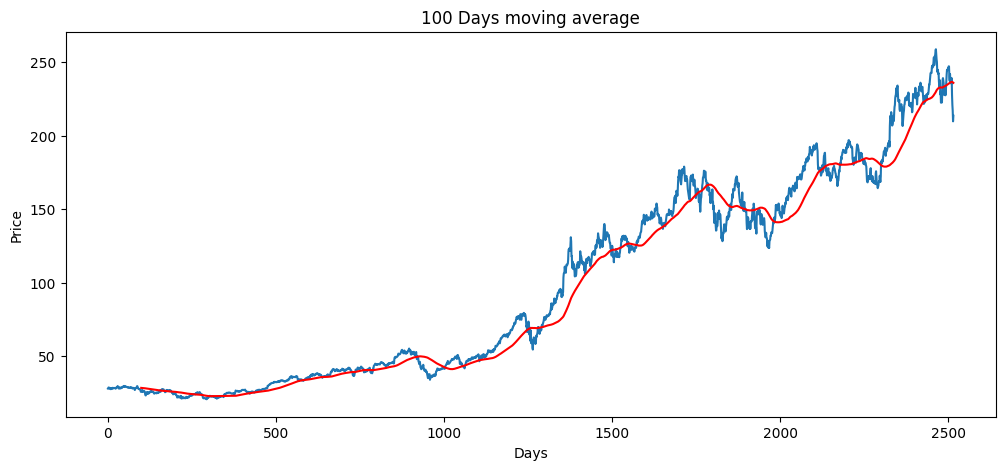

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], "r")
plt.title("100 Days moving average")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


# 200 days Moving Average

In [15]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-03-16,27.904793,27.904793,27.440273,27.665832,143497200,NaN,NaN
1,2015-03-17,28.371553,28.434085,28.061128,28.116960,204092400,NaN,NaN
2,2015-03-18,28.690903,28.844999,28.221915,28.362611,261083600,NaN,NaN
3,2015-03-19,28.474276,28.865099,28.451943,28.753435,183238000,NaN,NaN
4,2015-03-20,28.116962,28.675280,27.951700,28.641782,274780400,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2015-12-24,24.440701,24.660154,24.422601,24.660154,54281600,25.728053,NaN
199,2015-12-28,24.166946,24.363776,24.022153,24.341150,106816800,25.710925,27.046531
200,2015-12-29,24.601328,24.757434,24.175997,24.198621,123724800,25.697579,27.030014


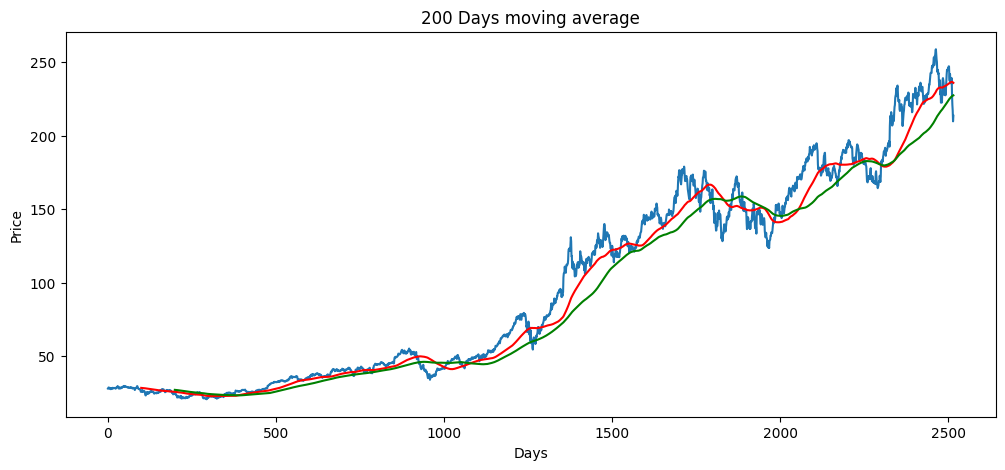

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], "r")
plt.plot(df['MA_200'], "g")
plt.title("200 Days moving average")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

### Calculating % changed in each trading session

In [17]:
df['percentage changed'] = df.Close.pct_change()
df[['Close', 'percentage changed']]

Price,Close,percentage changed
Ticker,AAPL,
0,27.904793,NaN
1,28.371553,0.016727
2,28.690903,0.011256
3,28.474276,-0.007550
4,28.116962,-0.012549
...,...,...
2511,227.479996,-0.048480
2512,220.839996,-0.029189
2513,216.979996,-0.017479


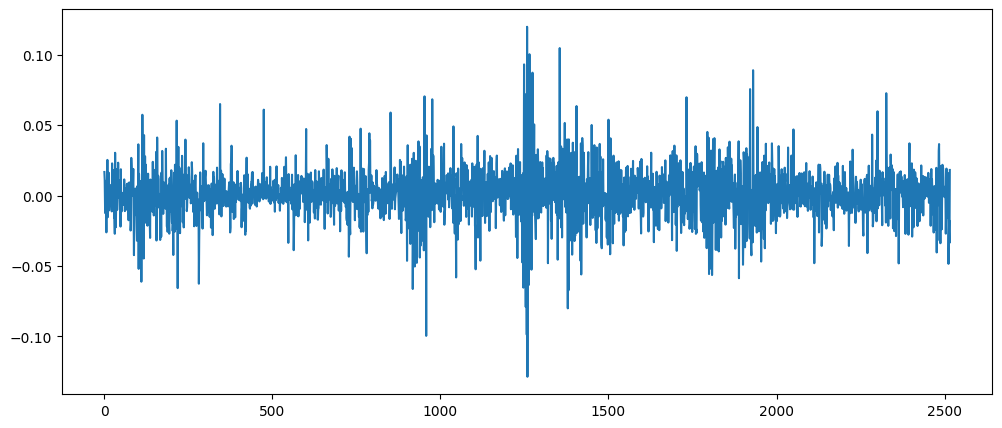

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df['percentage changed'])
plt.show()

# 4 Data Preprocessing

In [19]:
df.shape

(2516, 9)

# Splitting data into training & testing datasets

In [20]:
data_training= pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing= pd.DataFrame(df.Close[int(len(df)*0.7):-1])
print(data_training)
print(data_testing)

Ticker        AAPL
0        27.904793
1        28.371553
2        28.690903
3        28.474276
4        28.116962
...            ...
1756    160.568237
1757    156.759933
1758    154.929581
1759    160.351715
1760    155.992386

[1761 rows x 1 columns]
Ticker        AAPL
1761    152.262817
1762    148.218338
1763    152.617065
1764    157.045303
1765    158.058899
...            ...
2510    239.070007
2511    227.479996
2512    220.839996
2513    216.979996
2514    209.679993

[754 rows x 1 columns]


# Scaling down the data between 0 and 1

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0457017 ],
       [0.04865205],
       [0.05067062],
       ...,
       [0.8486124 ],
       [0.88288515],
       [0.85533028]])

In [23]:
data_training_array.shape

(1761, 1)

# 5 Sequence Creation

In [25]:
x_train = []                 # Training data
y_train = []                 # predictive data

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

1760


In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train

array([[[0.0457017 ],
        [0.04865205],
        [0.05067062],
        ...,
        [0.0372104 ],
        [0.03182377],
        [0.03290106]],

       [[0.04865205],
        [0.05067062],
        [0.04930135],
        ...,
        [0.03182377],
        [0.03290106],
        [0.03325709]],

       [[0.05067062],
        [0.04930135],
        [0.04704281],
        ...,
        [0.03290106],
        [0.03325709],
        [0.03381238]],

       ...,

       [[0.74340315],
        [0.76108201],
        [0.76778147],
        ...,
        [0.90328726],
        [0.88425377],
        [0.86018187]],

       [[0.76108201],
        [0.76778147],
        [0.77838886],
        ...,
        [0.88425377],
        [0.86018187],
        [0.8486124 ]],

       [[0.76778147],
        [0.77838886],
        [0.79209767],
        ...,
        [0.86018187],
        [0.8486124 ],
        [0.88288515]]])

In [28]:
y_train

array([0.03325709, 0.03381238, 0.03979295, ..., 0.8486124 , 0.88288515,
       0.85533028])

In [29]:
x_train.ndim

3

In [30]:
y_train.ndim

1

In [32]:
x_train.shape

(1661, 100, 1)

In [33]:
y_train.shape

(1661,)

# 6 Model Building

In [35]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [37]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [40]:
model = Sequential()
model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7 Model Training

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0257
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.1033e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.0809e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.0575e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.3171e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.4681e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.4234e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.6088e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.0324e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.7050e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.1563e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.7406e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.8866e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.8312e-04
Epoch 15/50
52/52 ━

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [44]:
# Save the trained model
model.save(f"{ticker}_stock_prediction_model.keras")

# 8 Preparing Test Data

In [46]:
past_100_days = data_training.tail(100)
past_100_days

Ticker,AAPL
1661,143.819839
1662,145.988647
1663,146.479324
1664,146.695251
1665,145.919968
...,...
1756,160.568237
1757,156.759933
1758,154.929581
1759,160.351715


In [50]:
data_testing

Ticker,AAPL
1761,152.262817
1762,148.218338
1763,152.617065
1764,157.045303
1765,158.058899
...,...
2510,239.070007
2511,227.479996
2512,220.839996
2513,216.979996


In [48]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,143.819839
1,145.988647
2,146.479324
3,146.695251
4,145.919968
...,...
849,239.070007
850,227.479996
851,220.839996
852,216.979996


In [52]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.49732694e-01],
       [1.65779823e-01],
       [1.69410368e-01],
       [1.71008025e-01],
       [1.65271657e-01],
       [1.64908456e-01],
       [1.69846390e-01],
       [1.66433630e-01],
       [1.93445329e-01],
       [1.73331632e-01],
       [1.67232176e-01],
       [1.74929176e-01],
       [1.85603252e-01],
       [1.81754696e-01],
       [1.85681492e-01],
       [1.79573117e-01],
       [1.82263765e-01],
       [1.61248105e-01],
       [1.60884452e-01],
       [1.76300693e-01],
       [1.76373514e-01],
       [1.83645442e-01],
       [2.01752105e-01],
       [2.33602724e-01],
       [2.53091064e-01],
       [2.56508904e-01],
       [2.59344855e-01],
       [2.63198717e-01],
       [2.25894434e-01],
       [2.50836664e-01],
       [2.87632104e-01],
       [2.83778355e-01],
       [2.76433492e-01],
       [2.62471637e-01],
       [2.87777520e-01],
       [3.30390278e-01],
       [3.58750574e-01],
       [3.54968968e-01],
       [3.90528033e-01],
       [3.63550092e-01],


In [53]:
input_data.shape

(854, 1)

In [55]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [56]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [57]:
x_test

array([[[0.14973269],
        [0.16577982],
        [0.16941037],
        ...,
        [0.23193428],
        [0.27205295],
        [0.23979803]],

       [[0.16577982],
        [0.16941037],
        [0.17100802],
        ...,
        [0.27205295],
        [0.23979803],
        [0.21220275]],

       [[0.16941037],
        [0.17100802],
        [0.16527166],
        ...,
        [0.23979803],
        [0.21220275],
        [0.18227743]],

       ...,

       [[0.79324487],
        [0.81207105],
        [0.7967886 ],
        ...,
        [0.8268214 ],
        [0.85449391],
        [0.76873878]],

       [[0.81207105],
        [0.7967886 ],
        [0.79952023],
        ...,
        [0.85449391],
        [0.76873878],
        [0.71960906]],

       [[0.7967886 ],
        [0.79952023],
        [0.82056118],
        ...,
        [0.76873878],
        [0.71960906],
        [0.6910487 ]]])

In [58]:
y_test

array([2.12202750e-01, 1.82277426e-01, 2.14823851e-01, 2.47588626e-01,
       2.55088276e-01, 2.79552485e-01, 2.89746055e-01, 3.14793057e-01,
       3.24913695e-01, 3.53018723e-01, 3.57751291e-01, 3.64158739e-01,
       3.88623174e-01, 3.79958503e-01, 3.56950599e-01, 3.54766085e-01,
       3.84836939e-01, 3.60226975e-01, 3.36709099e-01, 3.38966096e-01,
       3.24039957e-01, 2.92439977e-01, 3.06346962e-01, 3.26297066e-01,
       2.89090667e-01, 2.87489059e-01, 3.04453732e-01, 3.03215889e-01,
       2.97318300e-01, 2.63607305e-01, 2.71543315e-01, 2.27274531e-01,
       2.25599876e-01, 2.77077138e-01, 2.33463404e-01, 2.35720626e-01,
       2.46787709e-01, 2.94405803e-01, 2.27056181e-01, 2.32451928e-01,
       1.94388726e-01, 2.12253556e-01, 1.53846566e-01, 1.25117085e-01,
       1.58294625e-01, 1.46846615e-01, 1.73826137e-01, 1.12429201e-01,
       8.71269305e-02, 8.88768901e-02, 1.29127541e-01, 1.09075149e-01,
       1.10241864e-01, 1.34012976e-01, 1.76742812e-01, 1.70909462e-01,
      

# 9 Making Predictions

In [59]:
y_predicted = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step 


In [60]:
y_predicted

array([[0.24875861],
       [0.23410606],
       [0.21177624],
       [0.20658822],
       [0.21928833],
       [0.2355683 ],
       [0.25633013],
       [0.27469873],
       [0.29498288],
       [0.31176925],
       [0.33185738],
       [0.3465256 ],
       [0.3563202 ],
       [0.37053737],
       [0.37637162],
       [0.36845183],
       [0.35950905],
       [0.36587712],
       [0.36361593],
       [0.35133693],
       [0.342666  ],
       [0.33249494],
       [0.3140079 ],
       [0.30620295],
       [0.31169236],
       [0.30454645],
       [0.2967195 ],
       [0.29797682],
       [0.30055517],
       [0.30034676],
       [0.2867741 ],
       [0.27779874],
       [0.25677997],
       [0.23991764],
       [0.24861202],
       [0.24529472],
       [0.24124016],
       [0.24235411],
       [0.26176777],
       [0.25442326],
       [0.24479935],
       [0.22404696],
       [0.21394664],
       [0.1898174 ],
       [0.16098946],
       [0.15154122],
       [0.14689167],
       [0.154

In [61]:
y_test

array([2.12202750e-01, 1.82277426e-01, 2.14823851e-01, 2.47588626e-01,
       2.55088276e-01, 2.79552485e-01, 2.89746055e-01, 3.14793057e-01,
       3.24913695e-01, 3.53018723e-01, 3.57751291e-01, 3.64158739e-01,
       3.88623174e-01, 3.79958503e-01, 3.56950599e-01, 3.54766085e-01,
       3.84836939e-01, 3.60226975e-01, 3.36709099e-01, 3.38966096e-01,
       3.24039957e-01, 2.92439977e-01, 3.06346962e-01, 3.26297066e-01,
       2.89090667e-01, 2.87489059e-01, 3.04453732e-01, 3.03215889e-01,
       2.97318300e-01, 2.63607305e-01, 2.71543315e-01, 2.27274531e-01,
       2.25599876e-01, 2.77077138e-01, 2.33463404e-01, 2.35720626e-01,
       2.46787709e-01, 2.94405803e-01, 2.27056181e-01, 2.32451928e-01,
       1.94388726e-01, 2.12253556e-01, 1.53846566e-01, 1.25117085e-01,
       1.58294625e-01, 1.46846615e-01, 1.73826137e-01, 1.12429201e-01,
       8.71269305e-02, 8.88768901e-02, 1.29127541e-01, 1.09075149e-01,
       1.10241864e-01, 1.34012976e-01, 1.76742812e-01, 1.70909462e-01,
      

In [63]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [64]:
y_predicted

array([157.20343 , 155.2231  , 152.20517 , 151.50401 , 153.22046 ,
       155.42073 , 158.22675 , 160.7093  , 163.45076 , 165.71947 ,
       168.43442 , 170.41687 , 171.74063 , 173.66212 , 174.45064 ,
       173.38025 , 172.17162 , 173.03229 , 172.72667 , 171.06714 ,
       169.89525 , 168.5206  , 166.02202 , 164.96716 , 165.70908 ,
       164.7433  , 163.68546 , 163.8554  , 164.20386 , 164.17569 ,
       162.34131 , 161.12828 , 158.28752 , 156.00854 , 157.18362 ,
       156.73528 , 156.18729 , 156.33786 , 158.96164 , 157.96902 ,
       156.66833 , 153.86359 , 152.4985  , 149.23738 , 145.34122 ,
       144.06427 , 143.43588 , 144.44832 , 142.89897 , 140.04932 ,
       137.80127 , 138.12617 , 138.266   , 138.36963 , 139.4505  ,
       142.36247 , 144.64005 , 145.92097 , 147.27957 , 146.2099  ,
       145.04079 , 145.04387 , 145.12668 , 143.48123 , 140.15814 ,
       135.84283 , 132.88417 , 132.03027 , 130.524   , 129.73647 ,
       130.69156 , 131.78946 , 133.48645 , 135.89821 , 137.781

In [65]:
y_test

array([152.26281738, 148.21833801, 152.61706543, 157.04530334,
       158.05889893, 161.36529541, 162.74298096, 166.12814331,
       167.49597168, 171.29443359, 171.93405151, 172.80003357,
       176.10646057, 174.93540955, 171.82583618, 171.53059387,
       175.59474182, 172.26864624, 169.09014893, 169.39518738,
       167.37788391, 163.10707092, 164.9866333 , 167.68293762,
       162.65440369, 162.4379425 , 164.73075867, 164.5634613 ,
       163.76638794, 159.21026611, 160.28283691, 154.29980469,
       154.07347107, 161.03074646, 155.13624573, 155.4413147 ,
       156.9370575 , 163.37275696, 154.27029419, 154.99954224,
       149.85520935, 152.26968384, 144.37583923, 140.49298096,
       144.977005  , 143.42977905, 147.0761261 , 138.77818298,
       135.35852051, 135.59503174, 141.03500366, 138.32487488,
       138.4825592 , 141.69528198, 147.47032166, 146.68193054,
       146.55381775, 149.01754761, 143.27210999, 144.02104187,
       146.55381775, 145.81469727, 140.57182312, 135.14

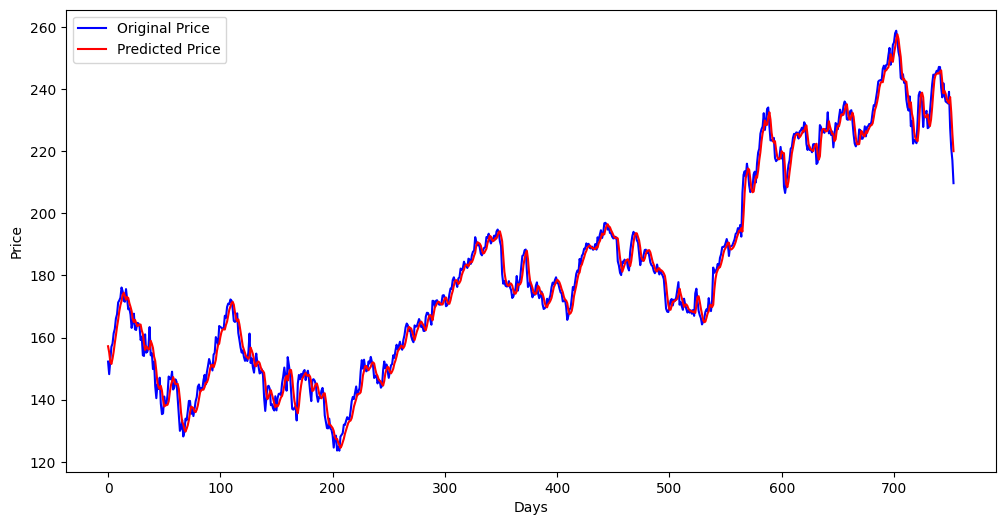

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

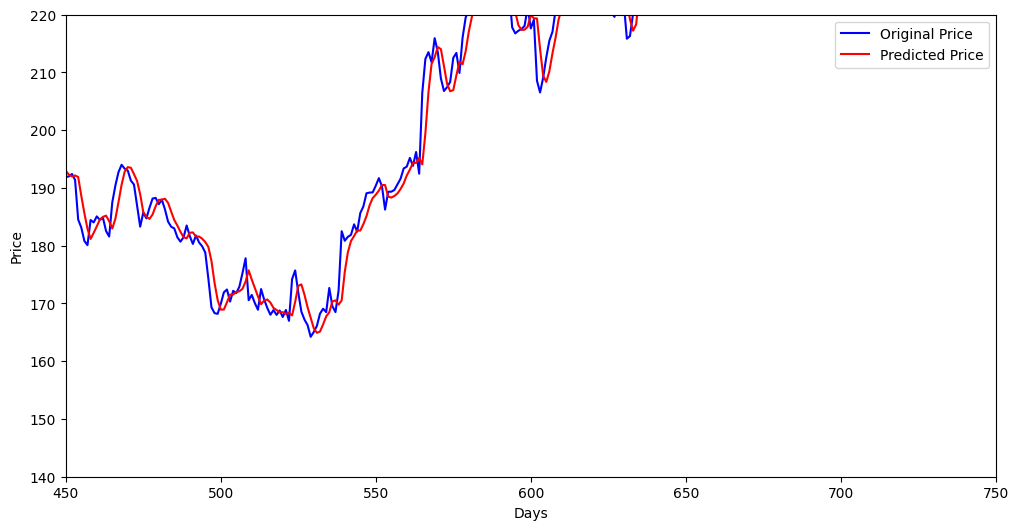

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)
plt.show()

# 10 Model Evaluation

In [75]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 12.50423128126828


In [77]:
# Root %ean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (MSE): {rmse}")

Root Mean Squared Error (MSE): 3.536132248837461


In [78]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9882582025052454
